# kaggle数据分析实践项目练习——人力资源分析
https://zhuanlan.zhihu.com/p/30282012

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
df = pd.read_csv('D:\\tianchi\\HR_comma_sep.csv')

In [89]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [90]:
df = df.rename(columns ={'satisfaction_level': 'satisfaction_level', 
                        'last_evaluation': 'last_evaluation',
                        'number_project': 'number_project',
                        'average_montly_hours': 'average_montly_hours',
                        'time_spend_company': 'time_spend_company',
                        'Work_accident': 'Work_accident',
                        'promotion_last_5years': 'promotion',
                        'Department':'department',
                        'salary' : 'salary',
                        'left' : 'left'
                        } )

In [91]:
df1 = pd.Series(df['department']).unique()
df1

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [92]:
df2 = pd.Series(df['salary']).unique()
df2

array(['low', 'medium', 'high'], dtype=object)

In [93]:
df['department'].replace(list(pd.Series(df['department']).unique()), np.arange(10), inplace=True)
df['salary'].replace(list(pd.Series(df['salary']).unique()),[0,1,2], inplace=True)

In [94]:
front = df['left']
df.drop(labels='left', axis=1, inplace=True)
df.insert(0, 'left', front)
df.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,0,0
1,1,0.80,0.86,5,262,6,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0


In [69]:
df.shape

(14999, 10)

In [70]:
df.dtypes

left                      int64
satisfaction_level      float64
last_evaluation         float64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
promotion                 int64
department                int64
salary                    int64
dtype: object

left：是否离职

satisfaction_level：满意度

last_evaluation：绩效评估

number_project：完成项目数

average_montly_hours：平均每月工作时间

time_spend_company：为公司服务的年限

work_accident：是否有工作事故

promotion：过去5 年是否有升职

salary：薪资水平

In [72]:
left_rate = df.left.value_counts()/14999
left_rate

0    0.761917
1    0.238083
Name: left, dtype: float64

探索分析

In [73]:
#对LEFT列进行聚合运算，描述性分析
left_summary = df.groupby('left')
left_summary.mean()
format = lambda x : "%.2f"%x
df.describe().applymap(format)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,department,salary
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.24,0.61,0.72,3.80,201.05,3.50,0.14,0.02,3.34,0.59
std,0.43,0.25,0.17,1.23,49.94,1.46,0.35,0.14,2.82,0.64
min,0.00,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00,0.00
25%,0.00,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00,0.00
50%,0.00,0.64,0.72,4.00,200.00,3.00,0.00,0.00,3.00,1.00
75%,0.00,0.82,0.87,5.00,245.00,4.00,0.00,0.00,6.00,1.00
max,1.00,1.00,1.00,7.00,310.00,10.00,1.00,1.00,9.00,2.00


In [74]:
#相关性分析
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values);
sns.plt.title('Heatmap of correlation Matrix')


NameError: name 'corr' is not defined

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
C:\Ana

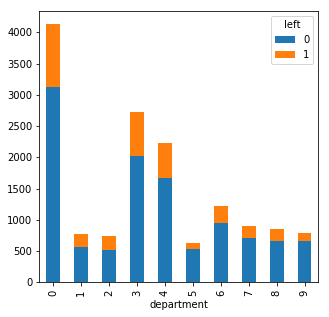

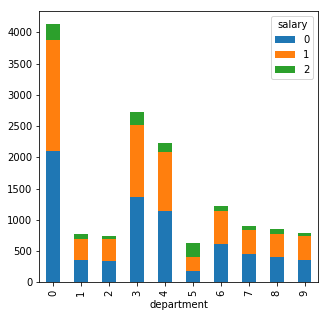

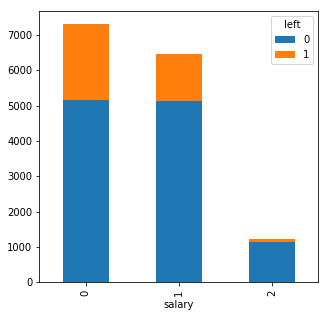

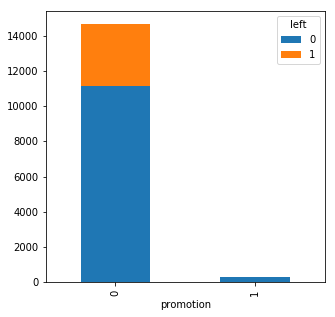

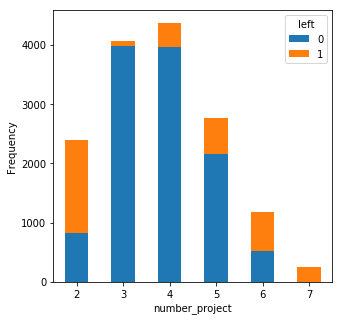

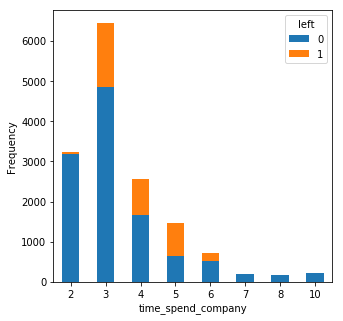

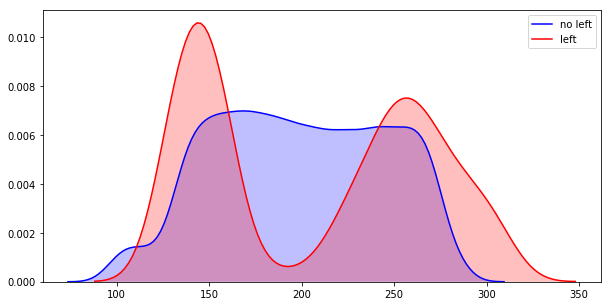

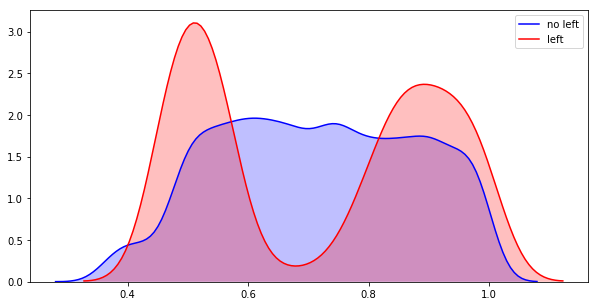

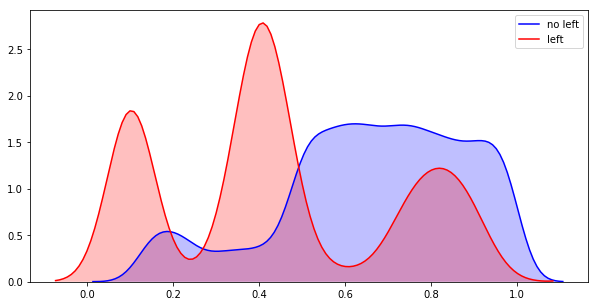

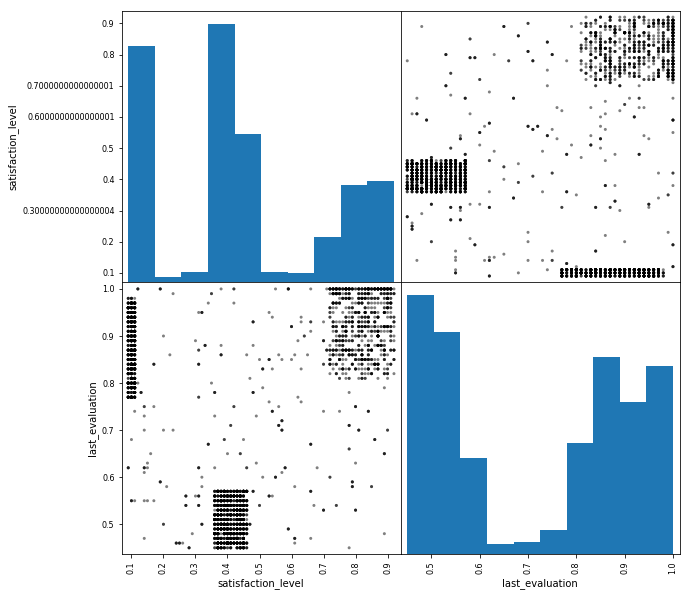

In [85]:
#变量分析
depart_left_table = pd.crosstab(index=df['department'], columns=df['left'])
depart_left_table.plot(kind='bar',figsize=(5,5),stacked=True)

depart_salary_table = pd.crosstab(index=df['department'], columns=df['salary'])
depart_salary_table.plot(kind='bar', figsize=(5,5), stacked=True)

salary_left_table = pd.crosstab(index=df['salary'], columns=df['left'])
salary_left_table.plot(kind='bar', figsize=(5,5),stacked=True)

promotion_left_table = pd.crosstab(index=df['promotion'], columns=df['left'])
promotion_left_table.plot(kind='bar', figsize=(5,5), stacked=True)

project_left_table = pd.crosstab(index=df['number_project'], columns=df['left'])
project_left_table.plot(kind='bar', figsize=(5,5), stacked=True)
df.loc[(df['left']==1), 'number_project'].plot(kind='hist', normed=1,bins=15, stacked=False, alpha=1)

company_left_table = pd.crosstab(index=df['time_spend_company'], columns=df['left'])
company_left_table.plot(kind='bar', figsize=(5,5), stacked=True)
df.loc[(df['left']==1),'time_spend_company'].plot(kind='hist', normed=1, bins=10, stacked=False, alpha=1)

#average_montly_hours  vs  left
hours_left_table = pd.crosstab(index=df['average_montly_hours'], columns=df['left'])
fig = plt.figure(figsize=(10,5))
letf = sns.kdeplot(df.loc[(df['left']==0),'average_montly_hours'],color='b', shade=True, label='no left')
left = sns.kdeplot(df.loc[(df['left']==1),'average_montly_hours'],color='r', shade=True, label='left')

#last_evaluation  vs  left
evaluation_left_table = pd.crosstab(index=df['last_evaluation'],columns=df['left'])
fig = plt.figure(figsize=(10,5))
left = sns.kdeplot(df.loc[(df['left']==0),'last_evaluation'], color='b', shade=True, label='no left')
left = sns.kdeplot(df.loc[(df['left']==1),'last_evaluation'], color='r', shade=True, label='left')

#satisfaction_level  vs  left  
satis_left_table = pd.crosstab(index=df['satisfaction_level'],columns=df['left'])
fig = plt.figure(figsize=(10,5))
left = sns.kdeplot(df.loc[(df['left']==0),'satisfaction_level'],color='b',shade=True,label='no left')
left = sns.kdeplot(df.loc[(df['left']==1),'satisfaction_level'],color='r',shade=True,label='left')

#last_evaluation  vs  satisfaction_level
df1=df[df['left']==1]
fig, ax = plt.subplots(figsize=(10,10))
pd.scatter_matrix(df1[['satisfaction_level','last_evaluation']],color='k',ax=ax)
plt.savefig('scatter.png',dpi=1000,bbox_inches='tight')

总结

员工离职概述：

离职员工工作时间大部分是~6hours /天（工作）和~10小时/天（劳累）；

大部分离职员工薪资都在low~medium这一档，薪资水平低；

离职员工，几乎都没有得到升职；

大多数离职员工的评价分数在0.6以下和0.8以上；

离职员工大多数有2个项目，但同样有4-7个项目的员工离开，3个项目的员工离职率最低；

完成项目数，每月平均工作时间，绩效评估有正相关关系。意味着你工作越多，得到的评价就越高；

离职率、满意度与薪酬呈负相关关系。这意味着较低的满意度和工资产生了较高的离职率；

公司需要考虑的问题：

1、失去优秀员工会让公司产生多大损失？招新人和优秀老员工之间的成本与变现孰轻孰重？

2、什么原因产生了较低的满意度？

3、为什么离开的员工平均比没有离开的员工得到更高的评价，甚至是项目数量的增加？低评价的员工不应该更倾向于离开公司吗？

优秀员工看中的是良好的待遇，和更好的职业发展，这些因素都直接影响员工的主观感受，公司给予了员工高的评价，但没有相应转化到薪资和升职的变量中，即使一部分离职的优秀员工给予了公司不错的满意度，但依然不能阻挡他们会追寻更好的工作机会。